In [ ]:
import csv
import nltk
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root = "/content/gdrive/MyDrive/Colab Notebooks/torch/"

# https://github.com/stanfordnlp/GloVe 6B

def load_glove():
    glove_path = root+"wordvectors/glove.6B.300d.txt"
    print("Loading glove vectors ...")
    with open(glove_path, encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=' ', quoting=csv.QUOTE_NONE)
        glove_embeddings = {line[0]: np.array(list(map(float, line[1:])))
                for line in reader}
    print("Glove vectors loaded")
    return glove_embeddings

In [ ]:
glove_embeddings = load_glove()

Loading glove vectors ...
Glove vectors loaded


In [ ]:
glove_embeddings['cat'].shape

(300,)

In [ ]:
## To find the nearest neighbors of a word
def find_nearest(word, glove_embeddings, k=5):
  distances = []
  word_vec = glove_embeddings[word]
  for w, vec in glove_embeddings.items():
    distance = np.linalg.norm(word_vec - vec)
    distances.append((w, distance))
  distances = sorted(distances, key=lambda x: x[1])
  return distances[:k]

print(find_nearest('cat', glove_embeddings))
print(find_nearest('water', glove_embeddings))

[('cat', 0.0), ('cats', 5.05374343410542), ('dog', 5.195904648012852), ('pet', 5.861308244916757), ('feline', 6.099418885456145)]
[('water', 0.0), ('drinking', 6.312944591548733), ('seawater', 6.570764800332372), ('potable', 6.673485737303555), ('supply', 6.685510937865386)]


In [ ]:
## To find the analogy between words
def find_analogy(a, b, c, glove_embeddings):
  a_vec = glove_embeddings[a]
  b_vec = glove_embeddings[b]
  c_vec = glove_embeddings[c]
  d_vec = b_vec - a_vec + c_vec
  distances = []
  for w, vec in glove_embeddings.items():
    distance = np.linalg.norm(d_vec - vec)
    distances.append((w, distance))
  distances = sorted(distances, key=lambda x: x[1])
  return distances[:1]

#print(find_analogy('king', 'man', 'queen', glove_embeddings))
#print(find_analogy('paris', 'france', 'rome', glove_embeddings))
print(find_analogy('woman', 'actress', 'man', glove_embeddings))
print(find_analogy('pianist', 'piano', 'guitarist', glove_embeddings))

[('actor', 4.416906856726949)]
[('guitar', 4.915512940288011)]


In [ ]:
words = ['woman', 'actress', 'man', 'actor', 'pianist',
         'piano', 'guitarist', 'guitar']

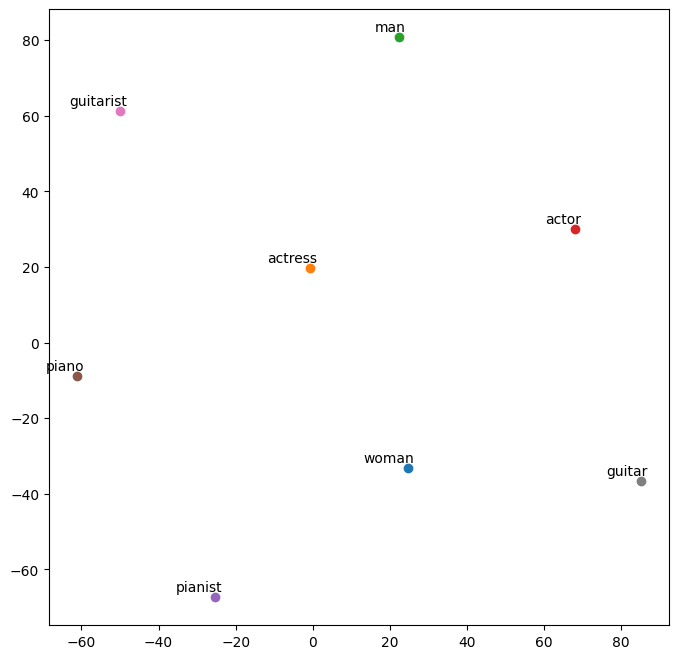

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2),
                     textcoords="offset points", ha="right", va="bottom")
    plt.show()

glove_words = [word for word in words if word in glove_embeddings]
visualize_embeddings(glove_embeddings, glove_words)

In [ ]:
from nltk.corpus import brown
nltk.download('brown')
categories = brown.categories()
print(categories)

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
words_brown = brown.words(categories=categories)
len(words_brown)

1161192

In [ ]:
brown.sents()[:2]

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.']]

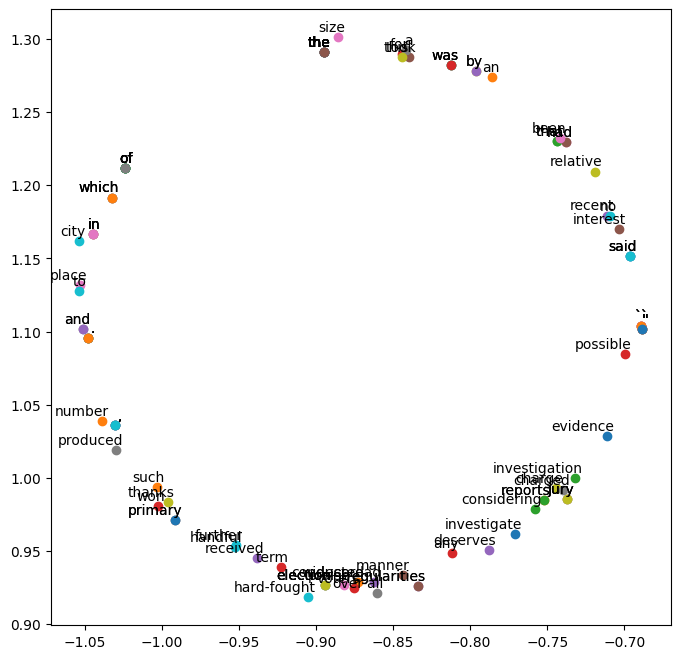

In [ ]:
glove_words = []
for sent in brown.sents()[:4]:
    glove_words.extend([word for word in sent if word in glove_embeddings])
visualize_embeddings(glove_embeddings, glove_words)